In [5]:
import pandas as pd
import FinanceDataReader as fdr

In [2]:
# 현대차 2022년 일별 시세

df = fdr.DataReader('005380', '2022')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,211500,212500,209000,210500,468732,0.007177
2022-01-04,212500,212500,208500,210000,499857,-0.002375
2022-01-05,214000,217500,212000,213500,1175411,0.016667
2022-01-06,210000,216500,210000,214000,866582,0.002342
2022-01-07,214500,216500,213500,215000,577852,0.004673


<AxesSubplot:xlabel='Date'>

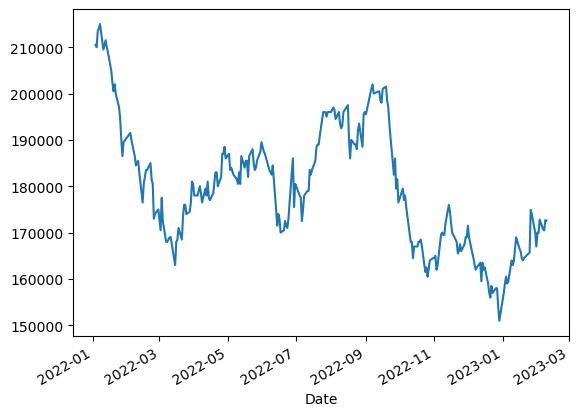

In [3]:
# 현대차 종가 시각화
df['Close'].plot()

# 상장종목 가져오기

In [7]:
df_krx = pd.read_csv('krx.csv')
df_krx.shape

(2612, 10)

In [8]:
item_name = '현대차'
df_krx.loc[df_krx['Name'] == item_name,'Symbol'].tolist()[0]

'005380'

# 종목명으로 종목 코드를 받아오는 함수 만들기 

In [14]:
def item_code_by_item_name(item_name):
    
    item_code_list = df_krx.loc[df_krx['Name'] == item_name, 'Symbol'].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    
    else:
        return False

In [15]:
item_code_by_item_name('현대차')

'005380'

In [16]:
fdr.DataReader(item_code_by_item_name('현대차'))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-10-31,11463,12409,11463,11918,544420,NaN
1998-11-02,12269,12409,11498,11497,358830,-0.035325
1998-11-03,11778,12199,11498,11848,512980,0.030530
1998-11-04,11568,11848,11428,11848,201370,0.000000
1998-11-05,11848,12760,11287,11848,527490,0.000000
...,...,...,...,...,...,...
2023-02-03,170100,174500,169600,172800,770290,0.017069
2023-02-06,174000,174700,170700,170700,582407,-0.012153
2023-02-07,171000,171200,169500,170500,533337,-0.001172


In [18]:
def find_item_list(item_name, year=2020):
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [19]:
find_item_list('현대차', 2022)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,211500,212500,209000,210500,468732,0.007177
2022-01-04,212500,212500,208500,210000,499857,-0.002375
2022-01-05,214000,217500,212000,213500,1175411,0.016667
2022-01-06,210000,216500,210000,214000,866582,0.002342
2022-01-07,214500,216500,213500,215000,577852,0.004673
...,...,...,...,...,...,...
2023-02-03,170100,174500,169600,172800,770290,0.017069
2023-02-06,174000,174700,170700,170700,582407,-0.012153
2023-02-07,171000,171200,169500,170500,533337,-0.001172


# 개별종목 시세 시각화

In [27]:
stock_daily = find_item_list('현대차', 2022)
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,211500,212500,209000,210500,468732,0.007177
2022-01-04,212500,212500,208500,210000,499857,-0.002375
2022-01-05,214000,217500,212000,213500,1175411,0.016667
2022-01-06,210000,216500,210000,214000,866582,0.002342
2022-01-07,214500,216500,213500,215000,577852,0.004673
...,...,...,...,...,...,...
2023-02-03,170100,174500,169600,172800,770290,0.017069
2023-02-06,174000,174700,170700,170700,582407,-0.012153
2023-02-07,171000,171200,169500,170500,533337,-0.001172


<AxesSubplot:xlabel='Date'>

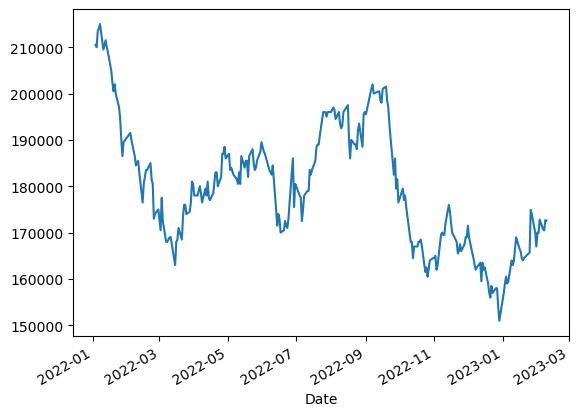

In [28]:
stock_daily['Close'].plot()

<AxesSubplot:xlabel='Date'>

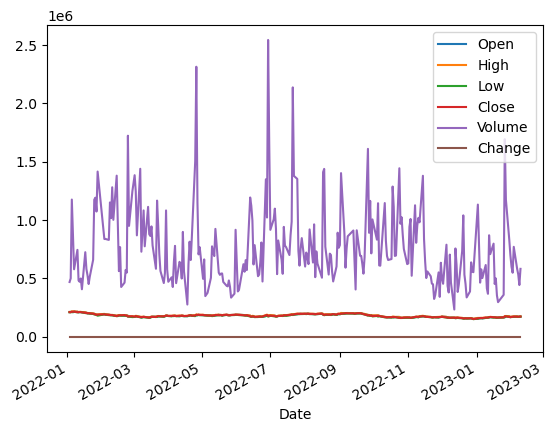

In [29]:
stock_daily.plot()

# 서브플롯 그리기`

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

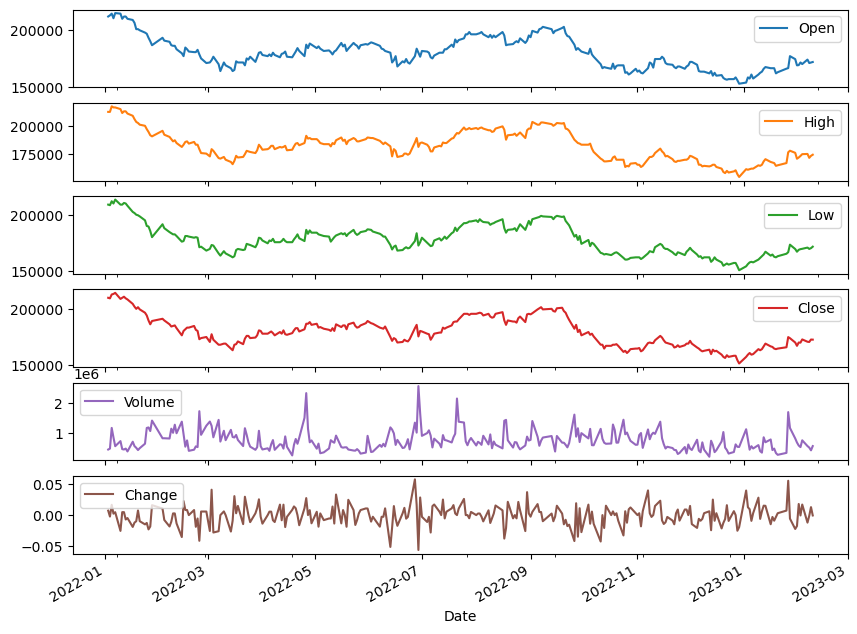

In [31]:
stock_daily.plot(subplots=True, figsize=(10, 8))

# 히스토그램 그리기

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Change'}>]], dtype=object)

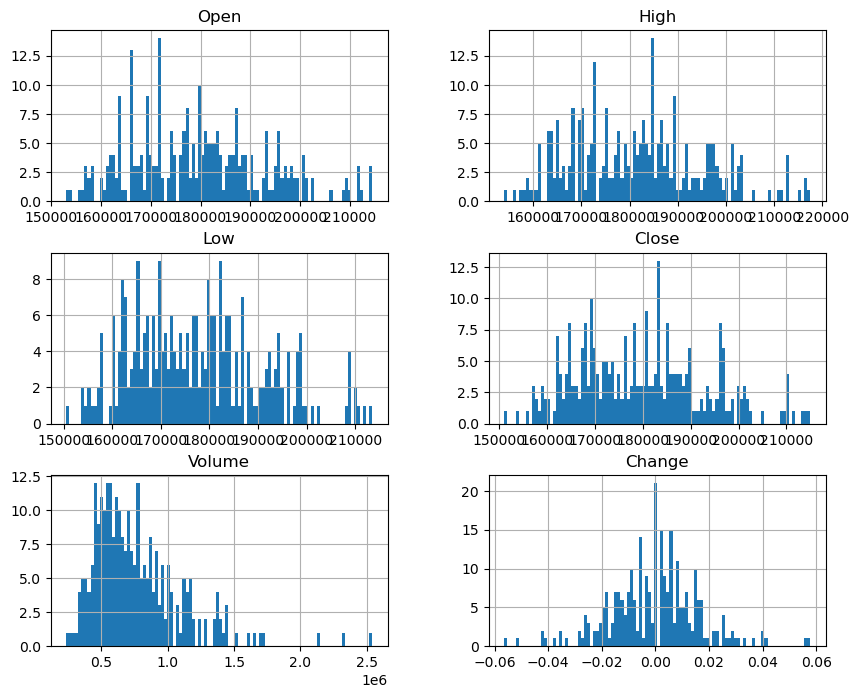

In [32]:
stock_daily.hist(figsize=(10, 8), bins=100)

<AxesSubplot:xlabel='Date'>

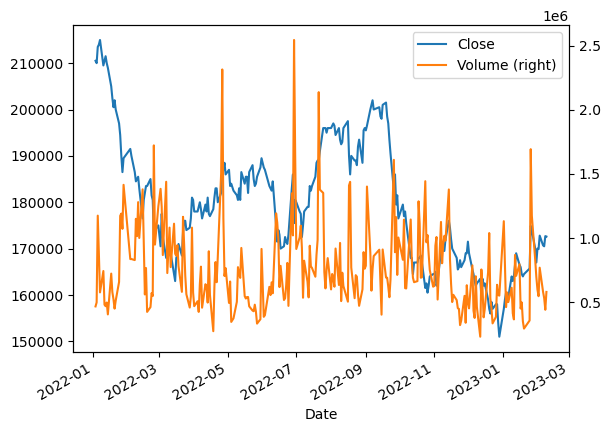

In [33]:
# secondary_y 옵션을 통한 종가와 거래량에 대한 2축 그래프 그리기
stock_daily[['Close', 'Volume']].plot(secondary_y = 'Volume')